<a href="https://colab.research.google.com/github/HasanMdKamrul/DataScienceProject/blob/main/Polynomial_regression(Position_Salaries--%3Edataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Although the ploynomial regression will help us to deal with the non-linear observations but our co-efficients are not non-linear so that the ploynomial regression is called a polynomial linear regression.

## Importing the dataset

In [81]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [82]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#In this section we're not spliting the datasets into training sets and the test set but why?
# Bcz we have a very limited data in out dataset and we only have a matrix of features X(Position level) so that to take the full advantage of the data we've we choose to put all the values to predict our result and thats why we didn't create a test set here. We will predict our result using our training datas only.

## Training the Polynomial Regression model on the whole dataset

In [37]:
# If we see our Simple linear regression and the ploynomial regression equation we'll find out that we are only dealing with one matrix of features X. But in ploynomial regression, which is kind of same as our Multiple linear regression in a way but containing only feature of X.
# Otherhand, This one matrix of feature X has a polynomial relation among it's features, X1, X1^2 and X1^n. So features will replace by this power of X in the multiple linear regression.
# Since we are taking advantage of our whole datas in our training model as it's very small. 
# Our first task here is to create the new matrix of features X with the nth order term.
# Then we will apply the same regression in our newly created dataset with the different orders.

In [83]:
from sklearn.preprocessing import PolynomialFeatures # In order to make our new data with order in the matrix of features X we imported this PolynomialFeatures class.
poly_reg = PolynomialFeatures(degree = 4) # An instance is created, where we specify our order of the independent variable. 
X_poly = ploy_reg.fit_transform(X) # On that instance we applied our transformation which will return us our desired dataset for the polynomial regression model. (Our first task ends here)
lin_reg_2 = LinearRegression() #(New instance created for our ploynomial regresiion which is same as the multiple linear regression but with one features with different orders)
lin_reg_2.fit(X_poly,y)# Polynomial regression applied at our training data which mean data trained here. (End of our second part)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

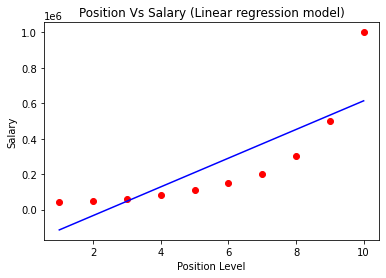

In [84]:
plt.scatter(X, y , color = 'red') # Real observations in linear model 
plt.plot(X, lin_reg.predict(X), color= 'blue') # Predicted linear regression
plt.title('Position Vs Salary (Linear regression model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

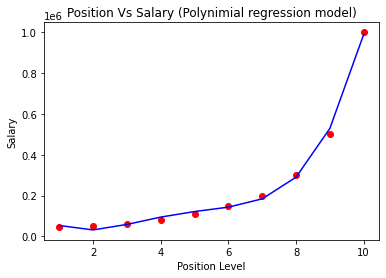

In [85]:
plt.scatter(X, y , color = 'red') # Real observations in linear model 
plt.plot(X, lin_reg_2.predict(X_poly), color= 'blue') # Predicted Ploynomial regression, where salary which is y is predicted so that we changed it according to our polynomial dataset as order terms.
plt.title('Position Vs Salary (Polynimial regression model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# As order increases the polynomial regression line fits more to the model and when we put order 4 here it's kind of overfitted but it's clearly showing that polynomial regression is the perfect fit for this model.

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

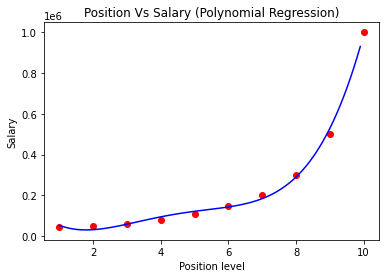

In [86]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Position Vs Salary (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [87]:
print(lin_reg.predict([[6.5]])) # We want to make prediction at position level 6.5. Fun Fact---> the result of the prediction we're getting here is well above the real one.

[330378.78787879]


## Predicting a new result with Polynomial Regression

In [88]:
print(lin_reg_2.predict(ploy_reg.fit_transform([[6.5]]))) # print(lin_reg_2.predict(X_poly))---> X_poly = poly_reg.fit_transform([[the value we want to predict in our case 6.5]])

[158862.45265155]
